# Homework #1
## Introduction to supervised learning

This colaboratory contains Homework #1 of the Machine Learning course, which is due **January 24, Saturday, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

## Submission's rules:

1. Please, submit only .ipynb that you extract from the Colaboratory.
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:
1. Pooh

##List of Homework's exercises:
1. [EX1](#scrollTo=tz9XASPxeqDC) - 3 points
2. [EX2](#scrollTo=BGVGqZGpxmzQ&uniqifier=1#) - 2 points
4. [EX3](#scrollTo=7p4GMeGK-QGL&uniqifier=1) - 1 points
5. [EX4](#scrollTo=nqV2c5sDc_f2&uniqifier=1) - 4 points
6. [Bonus 1](#scrollTo=_2T9ydozzcb-&uniqifier=1) - 2 points
7. [Bonus 2](#scrollTo=UkOtofaRjH8P&uniqifier=1) - up to 5 points

### Homework setup:
Here we will load necessary libraries (NumPy and Pandas) and MNIST dataset

In [1]:
import numpy as np  # for matrix stuff
import pandas as pd  # to work with datasets
import matplotlib.pyplot as plt  # subjectively ugly plotting here
from seaborn import countplot  # a bit less ugly plotting

# Getting MNIST one more time
from tensorflow.keras.datasets import mnist

(images, labels), (_, _) = mnist.load_data()
images = images / 255  # normalising images

print(f"images are of shape: {images.shape} and labels: {labels.shape}")

# Subsample the images
train_images = images[:2000]
train_labels = labels[:2000]

test_images = images[2000:3000]
test_labels = labels[2000:3000]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
images are of shape: (60000, 28, 28) and labels: (60000,)


## Homework exercise 1 (3 points): KNN
<font color='red'>One very popular variation of Nearest Neighbour is K-nearest neighbour. In this algorithm a label for a new instance is chosen by majority vote by **`k`** of its nearest neighbors.

<font color='red'>The actual algorithm is not very different from vanila nearest neighbour:

1. <font color='red'> Compute distances to all points in the dataset
2. <font color='red'> Find the **`k`** closest points (you may consider using `np.argsort` function)
3. <font color='red'> Report the most popular label from these **`k`**. (maybe `np.bincount` can help)

<font color='red'>**(Homework exercise 1- a)** Implement the aformentioned algorithm in the cell below (2.0 points)</font>

In [2]:
def dist(img1, img2):
    ##### YOUR CODE STARTS #####
    return np.sqrt(np.sum(np.square(img1 - img2)))
    ##### YOUR CODE ENDS #####


def classify_knn(image, k, train_images, train_labels):
    ##### YOUR CODE STARTS #####
    all_distances = []
    for img in train_images:
        all_distances.append(dist(img, image))
    all_distances = np.array(all_distances)

    knn = np.argsort(all_distances)[:k]
    knn_labels = train_labels[knn]

    counts = np.bincount(knn_labels)
    prediction = np.argmax(counts)
    ##### YOUR CODE ENDS #####
    return prediction

Test the function on two first images from `test_images`:

In [3]:
##### YOUR CODE STARTS #####
print(
    f"Predicted class for the first image is {classify_knn(test_images[0], 5, train_images, train_labels)} and the true label is {test_labels[0]}")
print(
    f"Predicted class for the second image is {classify_knn(test_images[1], 5, train_images, train_labels)} and the true label is {test_labels[1]}")
##### YOUR CODE ENDS #####

Predicted class for the first image is 6 and the true label is 5
Predicted class for the second image is 8 and the true label is 8


<font color='red'>**(Homework exercise 1- b)** Create a new function `classify_knn_print` from `classify_knn` that you have just implemented in **1- a**  by adding a print statement that outputs labels of K nearest neighbours. Report 10 nearest neighbours for the first two images from the `test_images`. Why do you think these digits were among the closest neighbours? (0.5 points) </font>

In [4]:
def classify_knn_print(image, k, train_images, train_labels):
    ##### YOUR CODE STARTS #####
    all_distances = []
    for img in train_images:
        all_distances.append(dist(img, image))
    all_distances = np.array(all_distances)

    knn = np.argsort(all_distances)[:k]
    knn_labels = train_labels[knn]

    counts = np.bincount(knn_labels)

    print(knn_labels)

    prediction = np.argmax(counts)
    ##### YOUR CODE ENDS #####
    return prediction

In [5]:
##### YOUR CODE STARTS #####
print(
    f"Predicted class for the first image is {classify_knn_print(test_images[0], 10, train_images, train_labels)} and the true label is {test_labels[0]}")
print(
    f"Predicted class for the second image is {classify_knn_print(test_images[1], 10, train_images, train_labels)} and the true label is {test_labels[1]}")
##### YOUR CODE ENDS #####

[6 6 5 9 6 6 9 5 9 6]
Predicted class for the first image is 6 and the true label is 5
[8 8 8 8 8 8 8 8 8 8]
Predicted class for the second image is 8 and the true label is 8


Answer to (b): In short, it's because of how these numbers are written. Our images are converted into a matrix of pixels. That's what we use to calculate distance. When numbers have a similar structure, angles of inclination and curvature, in other words, when they are simply similar, they will have a smaller Euclidean distance between feature vectors. This is what happened in the example with 5 6 9. To simplify it, 5 is missing a few pixels on the bottom hook to become 6, and if we draw a hook on top, we get 9. But 8 is quite unique in its structure, so we did not encounter an error.

<font color='red'>**(Homework exercise 1- c)** Classify all test images using `classify_knn` (**please, do not use print version**) and store them into a separate variable `test_predicted`, choose `k` = 5. Compute accuracy of your KNN model. (0.5 points) </font>

In [6]:
##### YOUR CODE STARTS #####
test_predicted = [classify_knn(img,5, train_images, train_labels) for img in test_images]
n_correct = np.sum(test_labels == test_predicted)
knn_accuracy = n_correct/len(test_labels)
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"Final accuracy of our nearest neighbor classifier is {knn_accuracy}. Not bad!")

Final accuracy of our nearest neighbor classifier is 0.912. Not bad!


## Homework exercise 2 (2 points): exploring misclassified examples
<font color='red'>**(Homework exercise 2- a)** Modify the visualisation code that we used during the practice session to visualise a grid of example images from different classes. Now, instead of random examples from each class, visualise misclassified examples from each class. For example, in the first column visualise images that had true label `0` but were classified as something else, in the second column, show examples of images that had label `1` but were misclassified into another class and so on. Add a title to each small image, in the following format `true_label, predicted_label` e.g. "0, 6" - image of class 0 was classified as 6. (1.5 points)

**NB! you need a variable `test_predicted` to exist from the previous exercise to complete this exericse.** </font>

In [7]:
#This was a test code, that shows, that in this is case is imposible to create graph what have 7 unique examples of each true label
num_classes = 10
for i in range(num_classes):
    wrong_idx = np.flatnonzero((test_labels == i) & (test_predicted != i))
    count_wrong = len(wrong_idx)
    print(f"{i}: {count_wrong}")

0: 94
1: 119
2: 101
3: 104
4: 111
5: 94
6: 106
7: 105
8: 89
9: 77


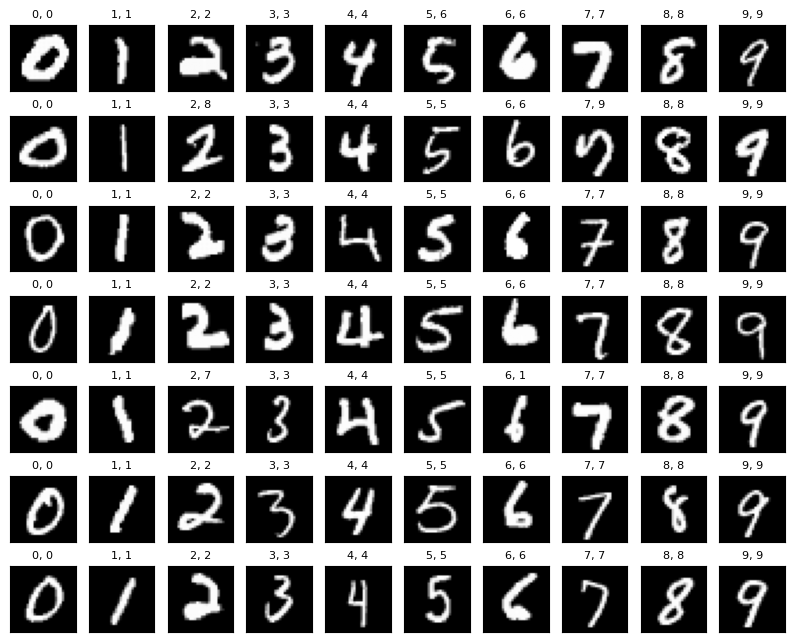

In [8]:
num_classes = 10
samples_per_class = 7
fig, axs = plt.subplots(samples_per_class, num_classes, figsize=(10.0, 8.0))
for i in range(num_classes):
    ##### YOUR CODE STARTS #####
    m_idx =  np.flatnonzero((test_labels == i) & (test_predicted != i))
    for j in range(min(samples_per_class, len(m_idx))):
        img_idx = m_idx[j]
        img_matrix = test_images[img_idx]
        axs[j, i].imshow(img_matrix, plt.get_cmap('gray'))
        axs[j, i].set_title(f"{test_labels[img_idx]}, {test_predicted[img_idx]}", fontsize=8)
    for j in range(len(m_idx), samples_per_class):
        axs[j, i].axis('off')
    ##### YOUR CODE ENDS #####
plt.setp(axs, xticks=[], yticks=[])  # set all axes off
plt.show()

<font color='red'>**(Homework exercise 2- b)** Take a careful look at the resulting figure. Are all classes equally missclassified? Why? Are there any classes that KNN confuses more often, why? (0.5 points) </font>

Answer to (b):  Digits 3, 4, and 8 account for the majority of the misclassifications produced by the algorithm, whereas digits 0, 1, and 6 exhibit fewer than seven errors. As discussed in the previous task, this behavior can be explained by the visual similarity between certain digits due to the way they are written. Additionally, the performance of the algorithm is influenced by the choice of the number of neighbors: when k is small, the method is more sensitive to noise, while for larger values of k, classes with a greater number of samples tend to dominate the classification results.

## Preparation for homework exercises 3 and 4
Next we will work with real-world dataset collected from taxis operating in New York City

In [9]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = "https://drive.google.com/file/d/18e8J9HJyUbLYw2S2xr-hCTCtTHNuFJ7_"  # The shareable link

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [10]:
downloaded = drive.CreateFile({'id': '18e8J9HJyUbLYw2S2xr-hCTCtTHNuFJ7_'})
downloaded.GetContentFile('nyc_data_2.zip')

# After archive has been downloaded
# unzip it
!unzip nyc_data_2.zip

InvalidConfigError: Invalid client secrets file ('Error opening file', 'client_secrets.json', 'No such file or directory', 2)

* `train_2M.csv` contains 2 million observations from NYC dataset (6 independent variables and fare_amount that we need to predict).
* `test.csv` contains new observations, for which we have to estimate `fare_amount` based on train data.
* `sample_submission.csv` - a sample submission file in the correct format (columns `key` and `fare_amount`). Every row in this file matches every row in `test.csv`.
* `model.pickle` - file that contains trained model saved as a pickle (we are going to deal with it later)

## Homework exercise 3 (1 point): read and explore `model.pickle`

<font color='red'> **(Homework exercise 3- a)** In this exercise we will use module `pickle` that let's you store your machine learning models as files. Later you can share these models (aka pickles) with your colleagues or your future self.

<font color='red'> In this exercise, use `pickle` module to read in `model.pickle` file that you have downloaded from `nyc_data_2.zip` using `pickle.load()` function. For details consult the documentation page: https://docs.python.org/3/library/pickle.html. (0.5 points)

In [ ]:
import pickle
import os

##### YOUR CODE STARTS #####
filename = ...
...
##### YOUR CODE ENDS #####

<font color='red'> **(Homework exercise 3- b)** next, explore the object using function `dir` and answer the following questions:
* <font color='red'> Which model was saved into this object?
* <font color='red'> How many coefficients it has and what are their values?
* <font color='red'>Can you find out which features have been used for training?

<font color='red'>(0.5 points)


Answers to (b):

### Setting up Kaggle

You need to have an account on Kaggle.com, before you proceed to the last exercise. When in your account, you need to download your API Token from kaggle. It's very easy:
1. Click on your profile icon
2. Go to **Account**
3. In **API** you press **Create new API token**

Now we load the file **kaggle.json** that you have downloaded, into this notebook:

In [ ]:
from google.colab import files

files.upload();

The next cell moves the file into a separate folder, sets secure access for it and configures your Kaggle profile for this notebook.

In [ ]:
import json

!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

In order to sign up for a NYC Taxi competition you need to accept the rules by cliking on "Late submission" button in the upper right corner: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

Make a test submission to ensure that the submission mechanism works

In [ ]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f sample_submission.csv -m "Sample submission test"

Now you can check `My submissions` tab on the website: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/submissions

## Read in the NYC data and perform basic preprocessing

In [ ]:
%%time

# note that we use only 1M out of 2M records
train = pd.read_csv('train_2M.csv', parse_dates=["pickup_datetime"],
                    nrows=1_000_000)  # the first row will automatically be interpreted as a header


# functions that add two new features abs_diff_longitude and abs_diff_latitude
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()


# adding two new features to train
add_travel_vector_features(train)

# reading in test and adding two new features to test
test = pd.read_csv('test.csv')
add_travel_vector_features(test)

# removing not available values and outliers
train = train.dropna(how='any', axis='rows')
train = train[(train.abs_diff_longitude < 5.0) & (train.abs_diff_latitude < 5.0)]

X = train.drop('fare_amount', axis=1)
y = train['fare_amount']

## Homework exercise 4 (4 points): K-fold cross-validation algorithm
<font color='red'> In the classroom we were cheating on our validation data when we hand-picked the number of decision trees (as we used validation data multiple times). The honest and better way of finding a good hyperparameter (depth of the tree) is a **K-fold cross-validation algorithm**.


<font color='red'> **(Homework exercise 4- a)** Implement the K-fold cross-validation algorithm using lecture slides and hints in comments. Use `abs_diff_longitude` and `abs_diff_latitude` featues and the K-fold cross-validation to find the most suitable depth of the tree.  (3.5 points) </font>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Fixing randomness, please do not change this line.
np.random.seed(1111)

max_depths = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20]
depth_RMSEs = list()

# 4-fold cross validation
for param in max_depths:
    print(f'Calculating RMSE for tree with a depth {param}...')
    ##### YOUR CODE STARTS #####
    # number of folds
    n_folds = 4

    # create a vector of fold indices
    # with length of this vector equal to number of rows in training data
    # you can use np.concatenate and np.repeat functions
    folds_indx = ...

    # for dataset with 8 entries you should get:
    # the following vector[0, 0, 1, 1, 2, 2, 3, 3]
    # chunks can be unequal if the number of rows is not divisible by 4

    # randomly shuffle the obtained indices
    ...

    # initialise variable that will hold RMSEs for each fold
    fold_RMSEs = ...
    for fold_indx in np.arange(n_folds):
        # split data into train_X, train_y and val_X, val_y depending on the fold
        # use previously generated folds_indx to fetch the right rows
        train_X = ...
        train_y = ...
        val_X = ...
        val_y = ...

        # a few tests that must pass to make sure you are doing the right thing
        # please, do not delete these lines
        assert len(train_X) + len(val_X) == len(
            X), "Train and validation sets combined should be equal to the size of the original dataset"
        assert len(train_X) > len(val_X), "Train set should be larger than validation set (at least three times)"
        assert len(train_X) == 748518 or len(train_X) == 748519, "Train set should be of size 748518 or 748519"

        # train the decision tree with max_depth = param
        dtr = ...

        # fit the decision tree on training data
        dtr.fit(...)

        # predict validation data
        val_predictions = ...

        # calculate RMSE on validation for this fold
        fold_RMSEs[fold_indx] = ...
    ##### YOUR CODE ENDS #####
    print(f'Average validation RMSE for {param} of trees is {np.mean(fold_RMSEs)}')
    depth_RMSEs.append(np.mean(fold_RMSEs))

<font color='red'> In the cell below, plot the resulting RMSEs for each max depth as a **lineplot**. Report the most optimal depth of the decision tree.

In [ ]:
##### YOUR CODE STARTS #####
...
##### YOUR CODE ENDS #####
plt.xticks(max_depths)
plt.xlabel("Max depth")
plt.ylabel("RMSE")
plt.show()

According to the above figure, the most optimal decision tree depth is ...

<font color='red'> **(Homework exercise 4- b)** Based on above results train the `DecisionTreeRegressor` on the entire training data. Use **the optimal number of trees** that you reported in **4 -a**. Predict the test set and submit the results to Kaggle. Check your results online and print out your new leaderboard score, which should be smaller than 4.02083. (0.5 points) </font>

In [ ]:
##### YOUR CODE STARTS #####
...

!kaggle ...

# just copy paste your new score below:
print(f"My new score is {}")
##### YOUR CODE ENDS #####

# Bonus exercises
**NB, these are optional exercises! These will be graded more strictly, hence you really need to impress with high quality of the solution to earn points. Add elaborate explanations and cool visuals.**

## Bonus exercise 1 (2 bonus points):

<font color='red'> Visualising misclassified examples can help to debug the classification algorithm. But misclassified examples may have different probabilities. In this bonus exercise (optional) try modifying code we have written for the homework exercise 2 so that title now would include probability of a true class and of a wrong class. You would probably need to change the code of `classify_knn` function. Describe the results. </font>

## Bonus exercise 2 (up to 5 points): the grand challenge
<font color='red'> Try to get into top 300 places on public leaderboard (RMSE < 3.04) using different ML algorithms with different parameters, more features, more data, better preprocessing. Here are some ideas for improvement:
* Use more data (we only took 1M out of 2M, there are 53M more on the website)
* Do more preprocessing (remember negative prices or unrealistic numbers of passengers?)
* Use more/better features (e.g. euclidean distance, or google what is haversine distance)
* Use some other regression algorithm (e.g. look into RandomForestRegressor from sklearn.ensemble)
* Tune parameters of these algorithms
* Try something else!
</font>

<font color='red'>You should make a small post here with code and elaborate explanations of what you have tried (do it even you did not manage to break into top 300). **Report your final leaderboard rank**. Number of points would depend on quality of your explanations and the resulting rank.</font>


In [ ]:
# Hint:
R = 6378


def haversine_distance(lon1, lon2, lat1, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c

    return km

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions:
* how much time did you spend on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us

Your comments:

# <font color='red'>  End of the homework. Please don't delete this cell.</font>